<a href="https://colab.research.google.com/github/AbdullahMakhdoom/Orange_Detection_YOLOv4/blob/main/orange_detection_yolov4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading & Configuring YOLOv4


1.    Download or clone the repository from this [link](https://github.com/AlexeyAB/darknet.git) .
2.    Unzip the contents of the repository.
3.    Make the following changes :-

*    Open "darknet-master" folder which we have just unzipped. Go to cfg folder.Make a copy of the file yolo4-custom.cfg now rename the copy file to yolo-obj.cfg.
*    Open the file yolo-obj.cfg then :- 

      a.   change max_batches to (classes*2000), in our orange dataset classes = 1, so max_batches = 2000.

      b.   change the line steps to (0.8 * max_batches ,0.9 * max_batches), in our case it will be steps = 1600, 1800.

      c.   set network size width=416 height=416.

      d.   change line classes=80 to your number of objects in each of 3 yolo layers. which is just 1.

      e.    change [filters=255] to filters=(classes + 5)x3 in the 3 convolutional  layer immediately before each 3 yolo layers. In our scenario, filters=18.


4. Download the pre trained weights from the link [ yolo4.conv.137 ](https://drive.google.com/file/d/1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp/view) and save it in the darknet-master folder.
5. Open wordpad and type the name of each object in separate lines and save the file as obj.names in darknet-master->data folder. In our case, just orange. Make sure there are not spaces at the end of file.
6. Create file obj.data in the folder darknet-master->data, containing the given text (replace classes = number of objects)
classes= 1
train  = data/train.txt
names = data/obj.names
backup = backup/
7. Create a folder in the directory darknet-master->data named obj now inside this obj folder put all your images and the respective txt files you got from labeling in step1
8. Now we have to create a train.txt file.This file directs to all training images as shown in the below picture.The easiest way to achieve this is store all images in a folder in computer open command prompt navigate to the folder using ‘cd’ and type command ‘ls’ if in linux and ‘dir’ if in windows.This will display all image names copy that and paste in text file and add ‘data/obj/images/’ to each line for this Find and replace option could be used.The train.txt file is stored in the darknet-master->data folder.


> ```
data/obj/images/Img1.png
data/obj/images/Img2.PNG
data/obj/images/Img3.PNG
data/obj/images/Img4.PNG
... 
```






9. In the darknet-master folder open Makefile in wordpad and change GPU=1,CUDNN=1,OPENCV=1 as shown in the following picture.This is done to make the training on GPU.


> ```
GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0 # ZED SDK 3.0 and above
ZED_CAMERA_v2_8=0 # ZED SDK 2.X
```

---



In the edit menu at top left select notebook settings and turn the hardware accelerator to GPU.This will help us to utilize a GPU in colab.

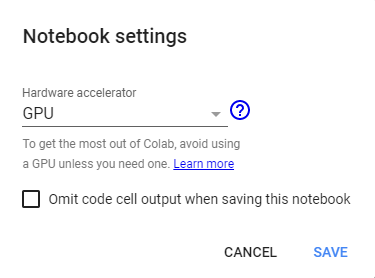

### Mount the Google Drive

Upload the darknet-master folder to your Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the directory to darknet-master.

**Note** : *If your path to darknet-master is different than the given.Just find the folder in the left side tab and right click and select option copy path and change code accordingly.*

In [2]:
%cd "/content/drive/My Drive/darknet-master/"

/content/drive/My Drive/darknet-master


Compile darknet by using following code


In [3]:
!make
!chmod +x ./darknet

chmod +x *.sh


To convert certain files to unix format, install dos2unix and execute the followings cells.

In [4]:
!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 1s (541 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 144793 files and directories curren

In [5]:
!dos2unix ./data/train.txt
!dos2unix ./data/obj.data
!dos2unix ./data/obj.names
!dos2unix ./cfg/yolo-obj.cfg

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/obj.data to Unix format...
dos2unix: converting file ./data/obj.names to Unix format...
dos2unix: ./cfg/yolo-obj.cfg: No such file or directory
dos2unix: Skipping ./cfg/yolo-obj.cfg, not a regular file.


### Training YOLOv4 on Orange Dataset

Note : *The training process could take several hours even days.But colab only allow a maximum of 12 hours of running time in ordinary accounts. What we could do is training by parts. After each 1000 epoch weights are saved in the backup folder so we could just retrain from there.For starting the training, run the code*.

In [ ]:
! ./darknet detector train data/obj.data cfg/yolo-obj.cfg yolov4.conv.137 -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
valid: Using default 'data/train.txt'
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

If training gets disturbed, run the following cell to load weights from backup `backup/yolo-obj_last.weights` and continue training.

In [ ]:
!./darknet detector train data/obj.data cfg/yolo-obj.cfg /content/drive/MyDrive/darknet-master/backup/yolo-obj_last.weights -dont_show -map #If training gets paused

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.657809, GIOU: 0.642572), Class: 0.980358, Obj: 0.425708, No Obj: 0.000231, .5R: 1.000000, .75R: 0.200000, count: 5, class_loss = 0.547094, iou_loss = 6.765622, total_loss = 7.312716 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000003, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 1873240, rewritten_bbox = 1.817172 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.802386, GIOU: 0.796348), Class: 0.994282, Obj: 0.719753, No Obj: 0.006577, .5R: 0.987539, .75R: 0.781931, count: 321, class_loss = 17.625629, iou_loss = 2233.539551, total_loss = 2251.165283 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.734548, GIOU: 0.732091), Class: 0.991886, Obj: 0.44

Execute the following cell to stop  Google Colab from disconnecting.

In [ ]:
while True:
  pass

### Inference

For predicting oranges using the trained YOLOv4, run the following cell.
The cell will ask for input path to the image.
Copy the path of iImage file to be predicted from going to Files in left side bar, and paste it in the input field.
The resulting detections will be saved as `predictions.png` in darknet-masters folder.


In [8]:
!./darknet detector test data/obj.data data/cfg/yolo-obj.cfg backup/yolo-obj_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image dat